In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autorank import autorank, plot_stats, create_report, latex_table

In [3]:
techniques = ['isvd', 'knn', 'mean', 'median', 'zero']
result_path = '../../imputed_kernels_results'


def get_dataframe(metric: str, percentage: str):
        cols = []
        for technique in techniques:
                cols.append(f'{technique}-{percentage}')


        result = pd.DataFrame(columns=cols)


        for fold in range(10):
                new_row = []
                
                for technique in techniques:
                        f1_score = np.loadtxt(f'{result_path}/{technique}/{percentage}/{metric}.txt')
                        new_row.append(f1_score[fold])
                
                result.loc[fold] = new_row
    
        return result

<h1>Metric: F1_score, Percentage: 70</h1>

In [4]:
data = get_dataframe('F1_score', '70')
data

,isvd-70,knn-70,mean-70,median-70,zero-70
0,0.557110,0.567481,0.599327,0.599099,0.489837
1,0.606264,0.541126,0.585143,0.597727,0.462926
2,0.576349,0.538961,0.591647,0.588372,0.490603
3,0.564460,0.584682,0.597254,0.605923,0.488613
4,0.582072,0.550785,0.569106,0.582547,0.501031
5,0.560452,0.569904,0.584091,0.587699,0.507375
6,0.595597,0.577726,0.598608,0.584029,0.474649
7,0.584989,0.569551,0.591422,0.611236,0.503511
8,0.578164,0.586982,0.576779,0.581773,0.481186
9,0.570093,0.570792,0.574394,0.591908,0.502629


In [5]:
result = autorank(data, alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
           meanrank      mean       std  ci_lower  ci_upper effect_size  \
zero-70         5.0  0.490236  0.014196  0.481507  0.498965         0.0   
knn-70          3.3  0.565799  0.016868   0.55707  0.574528   -4.847164   
isvd-70         3.0  0.577555  0.015509  0.568826  0.586284   -5.873293   
mean-70         2.1  0.586777  0.010687  0.578048  0.595506   -7.683572   
median-70       1.6  0.593031  0.010141  0.584303   0.60176   -8.332831   

            magnitude  
zero-70    negligible  
knn-70          large  
isvd-70         large  
mean-70         large  
median-70       large  
pvalue=8.521040515595838e-18
cd=None
omnibus=anova
posthoc=tukeyhsd
all_normal=True
pvals_shapiro=[0.42042049765586853, 0.23363667726516724, 0.36520472168922424, 0.4833107590675354, 0.8407180309295654]
homoscedastic=True
pval_homogeneity=0.49850413604727273
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.01
num_samples=10
posterior_matrix=
None
decision_matrix=
None
rope=None


In [6]:
create_report(result)

The statistical analysis was conducted for 5 populations with 10 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.234). Therefore, we assume that all populations are normal.
We applied Bartlett's test for homogeneity and failed to reject the null hypothesis (p=0.499) that the data is homoscedastic. Thus, we assume that our data is homoscedastic.
Because we have more than two populations and all populations are normal and homoscedastic, we use repeated measures ANOVA as omnibus test to determine if there are any significant differences between the mean values of the populations. If the results of the ANOVA test are significant, we use the post-hoc Tukey HSD test to infer which differences are significant. We report the mean value (M) and the standard deviation (SD) for each population. Populations are significantly different if their confid

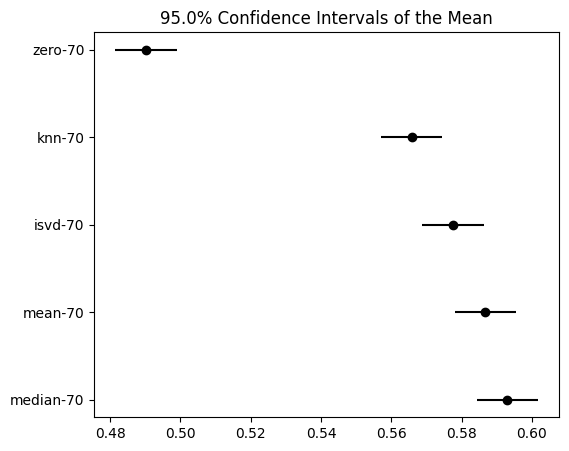

In [7]:
plot_stats(result)
plt.show()

In [8]:
latex_table(result)

\begin{table}[h]
\centering
\begin{tabular}{lrrlll}
\toprule
{} &     M &    SD &              CI &    \$d\$ &   Magnitude \\
\midrule
zero-70   & 0.490 & 0.014 &  [0.482, 0.499] &  0.000 &  negligible \\
knn-70    & 0.566 & 0.017 &  [0.557, 0.575] & -4.847 &       large \\
isvd-70   & 0.578 & 0.016 &  [0.569, 0.586] & -5.873 &       large \\
mean-70   & 0.587 & 0.011 &  [0.578, 0.596] & -7.684 &       large \\
median-70 & 0.593 & 0.010 &  [0.584, 0.602] & -8.333 &       large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


/home/victor/.local/lib/python3.9/site-packages/autorank/autorank.py:697: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_string = table_df.to_latex(float_format=float_format, na_rep='-').strip()


<h1>Metric: Pearson correlation, Percentage: 70</h1>

In [9]:
data = get_dataframe('Pearson_correlation', '70')
data

,isvd-70,knn-70,mean-70,median-70,zero-70
0,0.760491,0.759392,0.758866,0.769940,0.515590
1,0.751088,0.696915,0.742830,0.749692,0.498234
2,0.751134,0.655569,0.750583,0.760303,0.506423
3,0.743090,0.724893,0.742981,0.750672,0.516418
4,0.760080,0.656840,0.754148,0.768225,0.514191
5,0.751557,0.730113,0.757399,0.775280,0.491586
6,0.768462,0.752668,0.775027,0.778498,0.517058
7,0.775541,0.750362,0.784215,0.793390,0.546550
8,0.779131,0.756510,0.778540,0.782968,0.541903
9,0.758966,0.732611,0.754383,0.765928,0.530739


In [10]:
result = autorank(data, alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
           meanrank      mean       std  ci_lower  ci_upper effect_size  \
zero-70         5.0  0.517869  0.017622   0.49976  0.535979         0.0   
knn-70          3.9  0.721587  0.039168  0.681335   0.76184   -6.707881   
mean-70         2.8  0.759897  0.014540  0.744954   0.77484  -14.981948   
isvd-70         2.2  0.759954  0.011526  0.748109  0.771799  -16.259069   
median-70       1.1  0.769490  0.013794  0.755313  0.783666  -15.901011   

            magnitude  
zero-70    negligible  
knn-70          large  
mean-70         large  
isvd-70         large  
median-70       large  
pvalue=2.394096534864183e-07
cd=1.9288111473713958
omnibus=friedman
posthoc=nemenyi
all_normal=True
pvals_shapiro=[0.9139222502708435, 0.0411330871284008, 0.21868513524532318, 0.6556521654129028, 0.5860980153083801]
homoscedastic=False
pval_homogeneity=0.0006342933226122224
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.01
num_samples=10
posterior_matrix=
None
decision_matrix

In [11]:
create_report(result)

The statistical analysis was conducted for 5 populations with 10 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.041). Therefore, we assume that all populations are normal.
We applied Bartlett's test for homogeneity and reject the null hypothesis (p=0.001) that thedata is homoscedastic. Thus, we assume that our data is heteroscedastic.
Because we have more than two populations and the populations are normal but heteroscedastic, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the mean values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the mean value (M), the standard deviation (SD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference

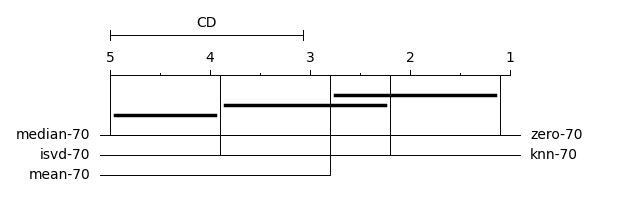

In [12]:
plot_stats(result)
plt.show()

In [13]:
latex_table(result)

\begin{table}[h]
\centering
\begin{tabular}{lrrrlll}
\toprule
{} &    MR &     M &    SD &              CI &     \$d\$ &   Magnitude \\
\midrule
zero-70   & 5.000 & 0.518 & 0.018 &  [0.500, 0.536] &   0.000 &  negligible \\
knn-70    & 3.900 & 0.722 & 0.039 &  [0.681, 0.762] &  -6.708 &       large \\
mean-70   & 2.800 & 0.760 & 0.015 &  [0.745, 0.775] & -14.982 &       large \\
isvd-70   & 2.200 & 0.760 & 0.012 &  [0.748, 0.772] & -16.259 &       large \\
median-70 & 1.100 & 0.769 & 0.014 &  [0.755, 0.784] & -15.901 &       large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


/home/victor/.local/lib/python3.9/site-packages/autorank/autorank.py:697: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_string = table_df.to_latex(float_format=float_format, na_rep='-').strip()


<h1>Metric: RMSE, Percentage: 70</h1>

In [14]:
data = get_dataframe('RMSE', '70')
data

,isvd-70,knn-70,mean-70,median-70,zero-70
0,2.262491,2.294633,2.295617,2.228375,4.093462
1,2.264935,2.647849,2.304176,2.270892,4.158296
2,2.257949,2.859701,2.240476,2.191128,4.059159
3,2.253826,2.406342,2.254122,2.206550,4.042336
4,2.206250,2.852822,2.263614,2.178202,4.080591
5,2.252552,2.354150,2.216594,2.124661,4.196991
6,2.237740,2.282412,2.236460,2.200182,4.116578
7,2.258939,2.406788,2.190750,2.143489,4.054636
8,2.184426,2.319331,2.211642,2.177600,3.978533
9,2.259245,2.355575,2.300757,2.240696,4.072563


In [15]:
result = autorank(data, alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
           meanrank    median       mad  ci_lower  ci_upper effect_size  \
median-70       4.9  2.195655  0.025387  2.124661  2.270892         0.0   
isvd-70         3.7  2.255888   0.00498  2.184426  2.264935   -2.220779   
mean-70         3.3  2.247299  0.033181   2.19075  2.304176   -1.179105   
knn-70          2.1  2.380958  0.073977  2.282412  2.859701   -2.259975   
zero-70         1.0  4.076577  0.028091  3.978533  4.196991  -47.385342   

            magnitude  
median-70  negligible  
isvd-70         large  
mean-70         large  
knn-70          large  
zero-70         large  
pvalue=2.893696151495398e-07
cd=1.9288111473713958
omnibus=friedman
posthoc=nemenyi
all_normal=False
pvals_shapiro=[0.008018619380891323, 0.9875406622886658, 0.534204363822937, 0.0032131164334714413, 0.8859145045280457]
homoscedastic=False
pval_homogeneity=0.004494917270205033
homogeneity_test=levene
alpha=0.05
alpha_normality=0.01
num_samples=10
posterior_matrix=
None
decision_matri

In [16]:
create_report(result)

The statistical analysis was conducted for 5 populations with 10 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations median-70 (p=0.008) and knn-70 (p=0.003). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference of the mean rank is greater than the critical distance CD=1.929 of the Nemenyi test.
We reject the null hypothesis (p=0.000) of the Friedman test that t

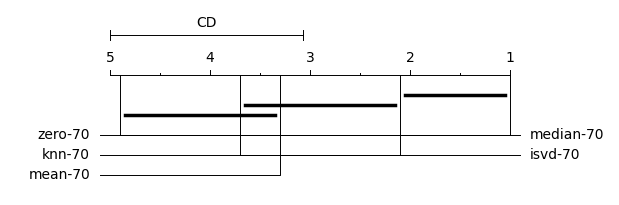

In [17]:
plot_stats(result)
plt.show()

In [18]:
latex_table(result)

\begin{table}[h]
\centering
\begin{tabular}{lrrllll}
\toprule
{} &    MR &   MED &   MAD &              CI & $\gamma$ &   Magnitude \\
\midrule
median-70 & 4.900 & 2.196 & 0.025 &  [2.125, 2.271] &     0.000 &  negligible \\
isvd-70   & 3.700 & 2.256 & 0.005 &  [2.184, 2.265] &    -2.221 &       large \\
mean-70   & 3.300 & 2.247 & 0.033 &  [2.191, 2.304] &    -1.179 &       large \\
knn-70    & 2.100 & 2.381 & 0.074 &  [2.282, 2.860] &    -2.260 &       large \\
zero-70   & 1.000 & 4.077 & 0.028 &  [3.979, 4.197] &   -47.385 &       large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


/home/victor/.local/lib/python3.9/site-packages/autorank/autorank.py:697: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_string = table_df.to_latex(float_format=float_format, na_rep='-').strip()
